In [ ]:
import pandas as pd
import ast

In [ ]:
df = pd.read_csv("Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv")
df.describe()

,Mega Ball,Multiplier
count,1936.000000,1033.000000
mean,18.876550,3.423040
std,13.390565,1.017355
min,1.000000,2.000000
25%,8.000000,3.000000
50%,15.000000,3.000000
75%,29.000000,4.000000
max,52.000000,5.000000


In [ ]:
df.head()

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,12/11/2020,19 31 37 55 67,25,4.0
1,12/8/2020,15 19 33 39 68,25,3.0
2,12/4/2020,03 19 24 44 50,8,3.0
3,12/1/2020,07 33 53 61 65,14,2.0
4,11/27/2020,04 10 27 35 58,10,2.0


In [91]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [ ]:
df["Draw Date"]= pd.to_datetime(df["Draw Date"]) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Draw Date        1936 non-null   datetime64[ns]
 1   Winning Numbers  1936 non-null   object        
 2   Mega Ball        1936 non-null   int64         
 3   Multiplier       1033 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 60.6+ KB


In [ ]:
df = df.rename({'Draw Date': 'Draw_Date', 'Winning Numbers': 'Winning_Numbers','Mega Ball': 'Mega_Ball'}, axis=1)

In [ ]:
df['Winning_Numbers'] = [x.strip(' ').split(',') for x in df['Winning_Numbers']]

In [ ]:
df['Winning_Numbers'] = df['Winning_Numbers'].apply(lambda x: [i.split(' ') for i in x])


In [ ]:
df

,Draw_Date,Winning_Numbers,Mega_Ball,Multiplier
0,2020-12-11,"[[19, 31, 37, 55, 67]]",25,4.0
1,2020-12-08,"[[15, 19, 33, 39, 68]]",25,3.0
2,2020-12-04,"[[03, 19, 24, 44, 50]]",8,3.0
3,2020-12-01,"[[07, 33, 53, 61, 65]]",14,2.0
4,2020-11-27,"[[04, 10, 27, 35, 58]]",10,2.0
...,...,...,...,...
1931,2002-05-31,"[[12, 28, 45, 46, 52]]",47,NaN
1932,2002-05-28,"[[06, 21, 22, 29, 32]]",24,NaN
1933,2002-05-24,"[[02, 04, 32, 44, 52]]",36,NaN
1934,2002-05-21,"[[04, 28, 39, 41, 44]]",9,NaN


In [ ]:
df['Winning_Numbers'] = df['Winning_Numbers'].apply(lambda x: sum(x, []))


In [ ]:
df

,Draw_Date,Winning_Numbers,Mega_Ball,Multiplier
0,2020-12-11,"[19, 31, 37, 55, 67]",25,4.0
1,2020-12-08,"[15, 19, 33, 39, 68]",25,3.0
2,2020-12-04,"[03, 19, 24, 44, 50]",8,3.0
3,2020-12-01,"[07, 33, 53, 61, 65]",14,2.0
4,2020-11-27,"[04, 10, 27, 35, 58]",10,2.0
...,...,...,...,...
1931,2002-05-31,"[12, 28, 45, 46, 52]",47,NaN
1932,2002-05-28,"[06, 21, 22, 29, 32]",24,NaN
1933,2002-05-24,"[02, 04, 32, 44, 52]",36,NaN
1934,2002-05-21,"[04, 28, 39, 41, 44]",9,NaN


In [ ]:
#df = pd.DataFrame(df["Winning_Numbers"].to_list(), columns=['Winning_Number_1', 'Winning_Number_2','Winning_Number_3','Winning_Number_4','Winning_Number_5'])
df[['Winning_Number_1', 'Winning_Number_2','Winning_Number_3','Winning_Number_4','Winning_Number_5']] = pd.DataFrame(df.Winning_Numbers.tolist(), index= df.index).astype(str).astype(int)

In [ ]:
df

,Draw_Date,Winning_Numbers,Mega_Ball,Multiplier,Winning_Number_1,Winning_Number_2,Winning_Number_3,Winning_Number_4,Winning_Number_5
0,2020-12-11,"[19, 31, 37, 55, 67]",25,4.0,19,31,37,55,67
1,2020-12-08,"[15, 19, 33, 39, 68]",25,3.0,15,19,33,39,68
2,2020-12-04,"[03, 19, 24, 44, 50]",8,3.0,3,19,24,44,50
3,2020-12-01,"[07, 33, 53, 61, 65]",14,2.0,7,33,53,61,65
4,2020-11-27,"[04, 10, 27, 35, 58]",10,2.0,4,10,27,35,58
...,...,...,...,...,...,...,...,...,...
1931,2002-05-31,"[12, 28, 45, 46, 52]",47,NaN,12,28,45,46,52
1932,2002-05-28,"[06, 21, 22, 29, 32]",24,NaN,6,21,22,29,32
1933,2002-05-24,"[02, 04, 32, 44, 52]",36,NaN,2,4,32,44,52
1934,2002-05-21,"[04, 28, 39, 41, 44]",9,NaN,4,28,39,41,44


In [ ]:
del df['Winning_Numbers']

In [ ]:
df

,Draw_Date,Mega_Ball,Multiplier,Winning_Number_1,Winning_Number_2,Winning_Number_3,Winning_Number_4,Winning_Number_5
0,2020-12-11,25,4.0,19,31,37,55,67
1,2020-12-08,25,3.0,15,19,33,39,68
2,2020-12-04,8,3.0,3,19,24,44,50
3,2020-12-01,14,2.0,7,33,53,61,65
4,2020-11-27,10,2.0,4,10,27,35,58
...,...,...,...,...,...,...,...,...
1931,2002-05-31,47,NaN,12,28,45,46,52
1932,2002-05-28,24,NaN,6,21,22,29,32
1933,2002-05-24,36,NaN,2,4,32,44,52
1934,2002-05-21,9,NaN,4,28,39,41,44


In [ ]:
df["Multiplier"].fillna(1.0, inplace = True) 


In [ ]:
import seaborn as sns

In [ ]:
dfwithoutdate = df[['Mega_Ball','Multiplier',	'Winning_Number_1',	'Winning_Number_2',	'Winning_Number_3',	'Winning_Number_4',	'Winning_Number_5']].copy()

In [ ]:
dfwithoutdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936 entries, 0 to 1935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mega_Ball         1936 non-null   int64  
 1   Multiplier        1936 non-null   float64
 2   Winning_Number_1  1936 non-null   int64  
 3   Winning_Number_2  1936 non-null   int64  
 4   Winning_Number_3  1936 non-null   int64  
 5   Winning_Number_4  1936 non-null   int64  
 6   Winning_Number_5  1936 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 106.0 KB


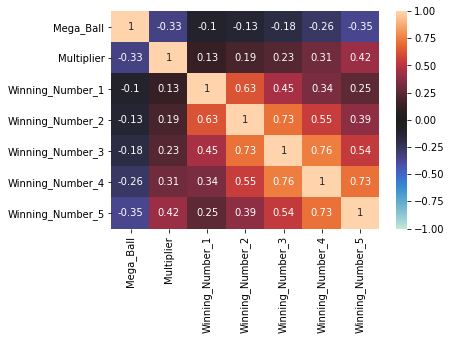

In [ ]:
sns.heatmap(dfwithoutdate.corr(),annot=True,vmin=-1,vmax=1,center=0)

*This correlation heatmap shows some very interesting characteristics, not a lot about how numbers affect chances of winning but more so about how people generally pick lottery numbers.*

It is evident that while choosing numbers, people tend to pick successive numbers that are relatively closer to each other, and so that's why correlation between Winning_Number1, Winning_Number2 and Winning_Number2, Winning_Number3 and so on are high positive correlations.

Another slightly interesting observation that one can infer is that because multiplier is generally chosen at last, Winning_Number5 has a relatively higher influence in what multiplier will be chosen although this is not too significant a correlation.


In the bar graphs below, x axis denotes which number won and y axis denotes  the Number of times that number won 

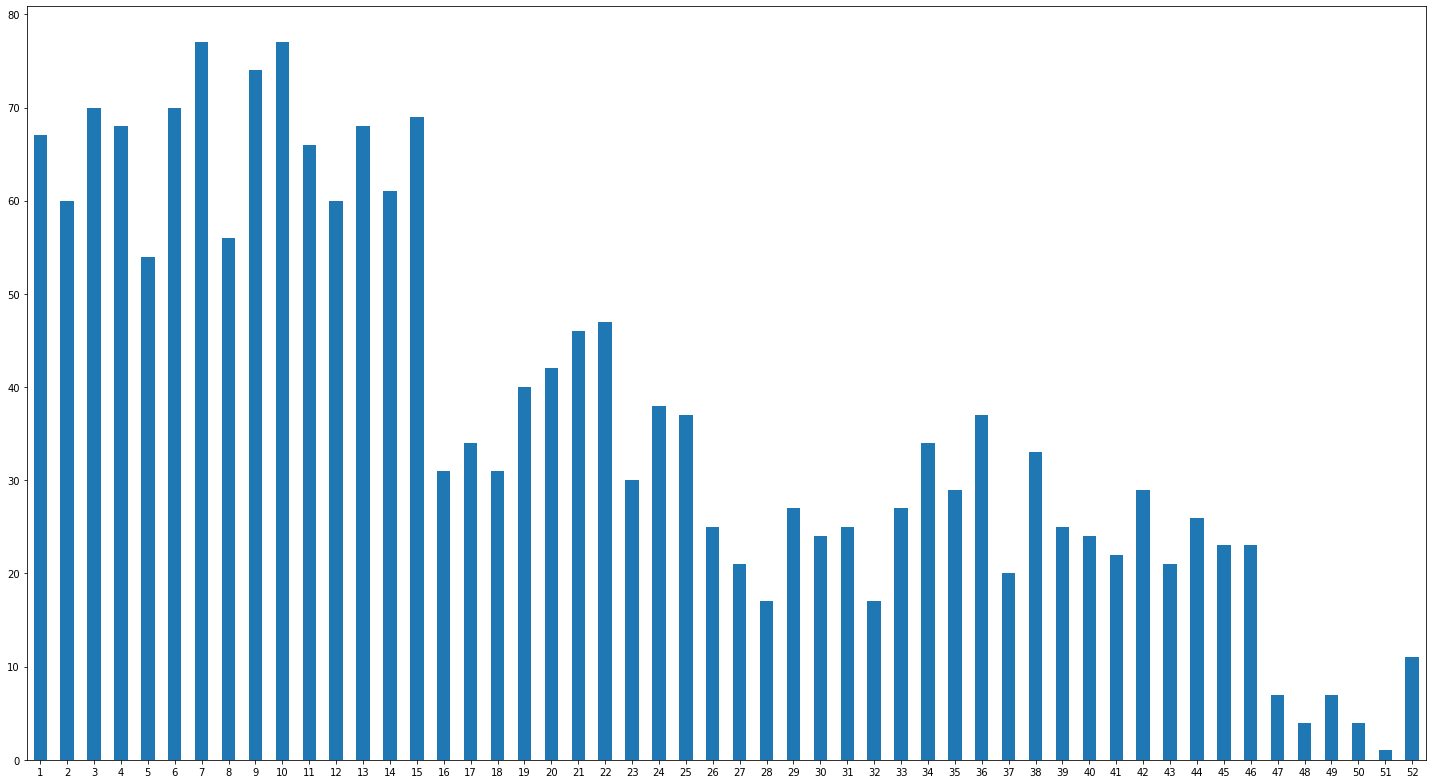

In [102]:
dfwithoutdate['Mega_Ball'].value_counts().sort_index().plot.bar(figsize = (20,11),rot=0)

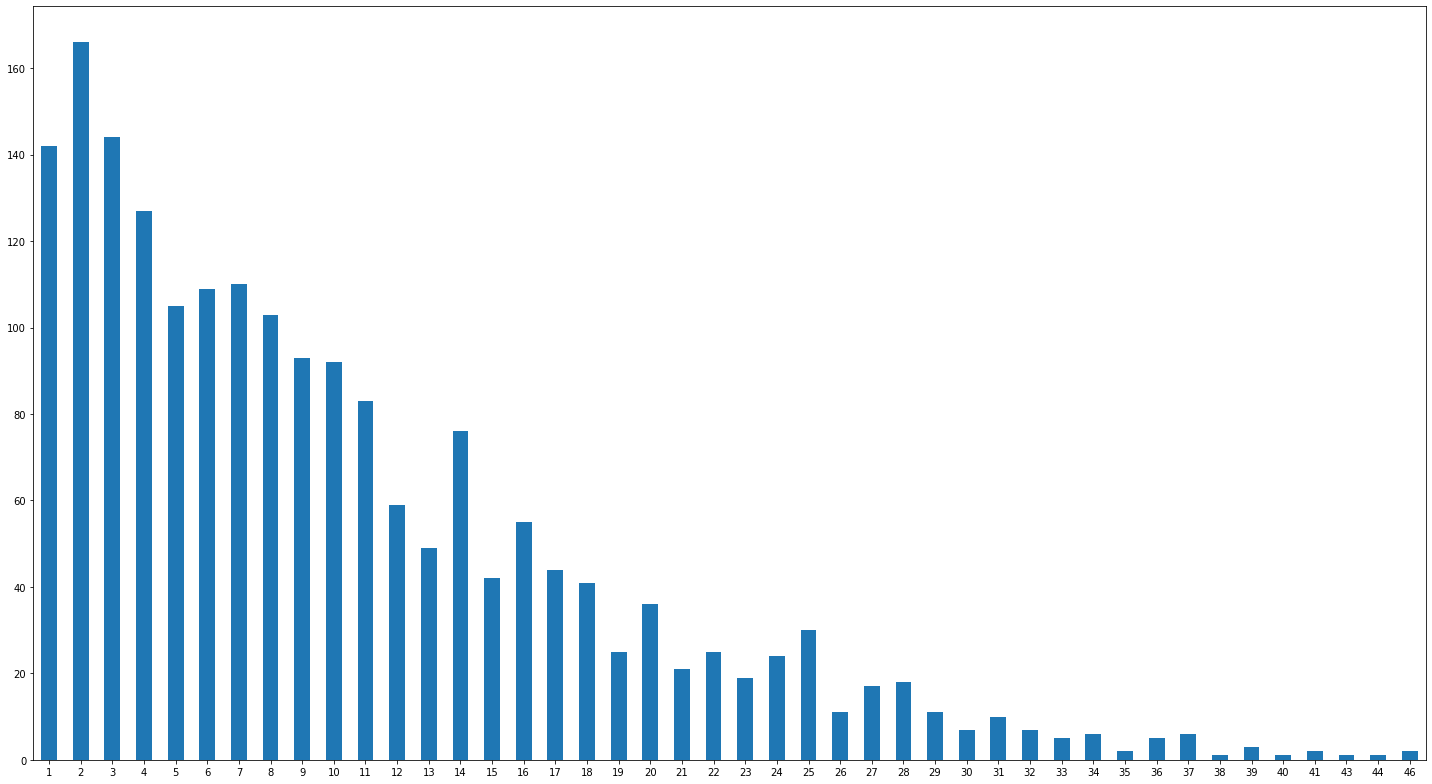

In [100]:
dfwithoutdate['Winning_Number_1'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (20,11),rot=0)

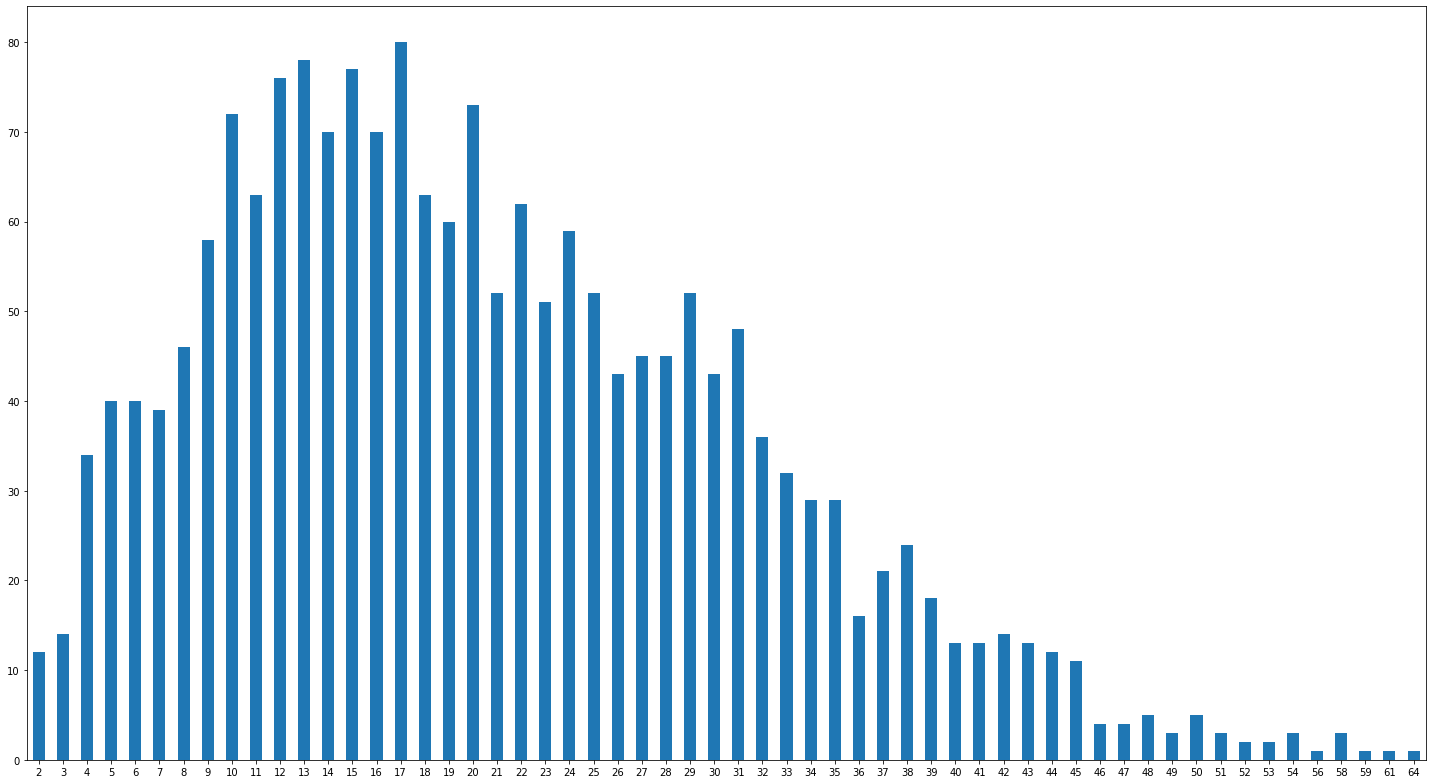

In [99]:
dfwithoutdate['Winning_Number_2'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (20,11),rot=0)

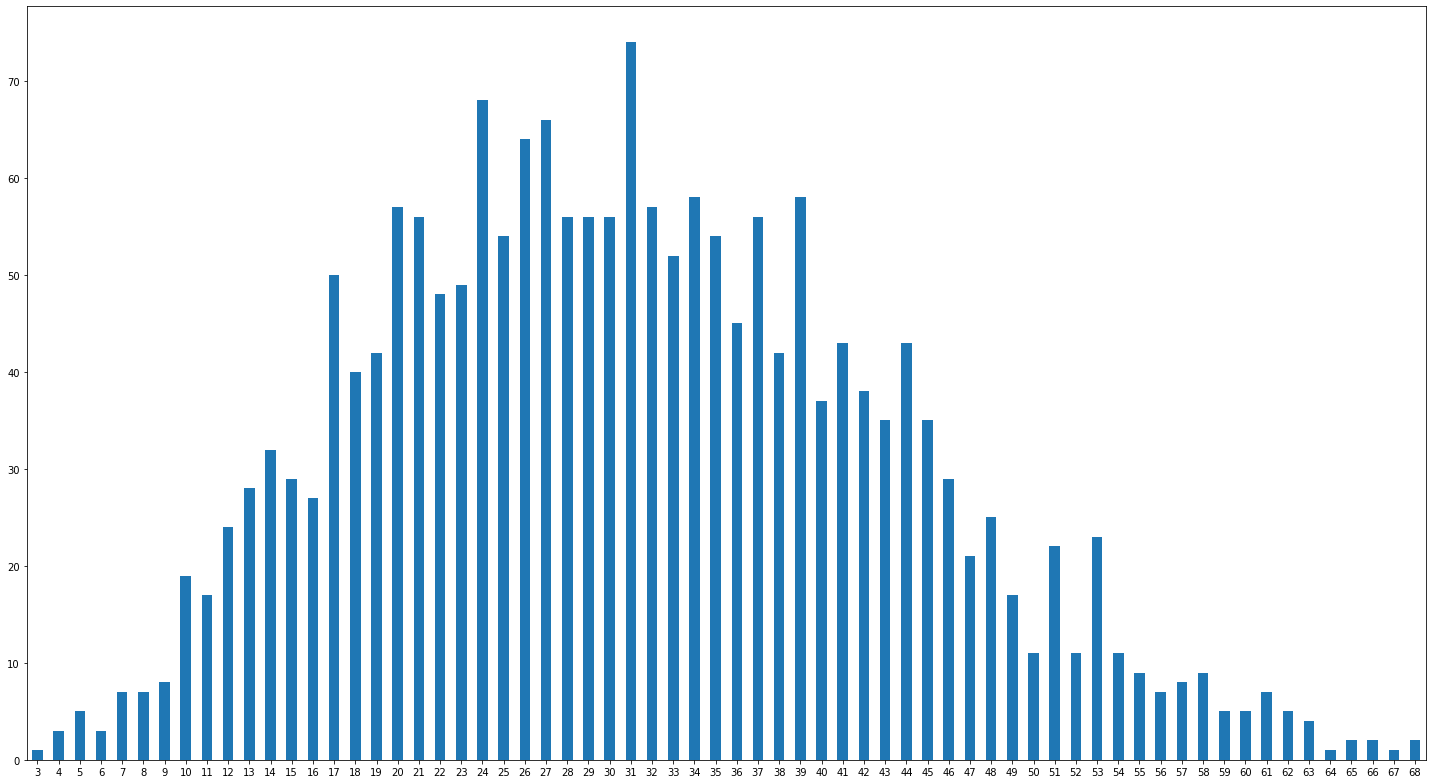

In [98]:
dfwithoutdate['Winning_Number_3'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (20,11),rot=0)

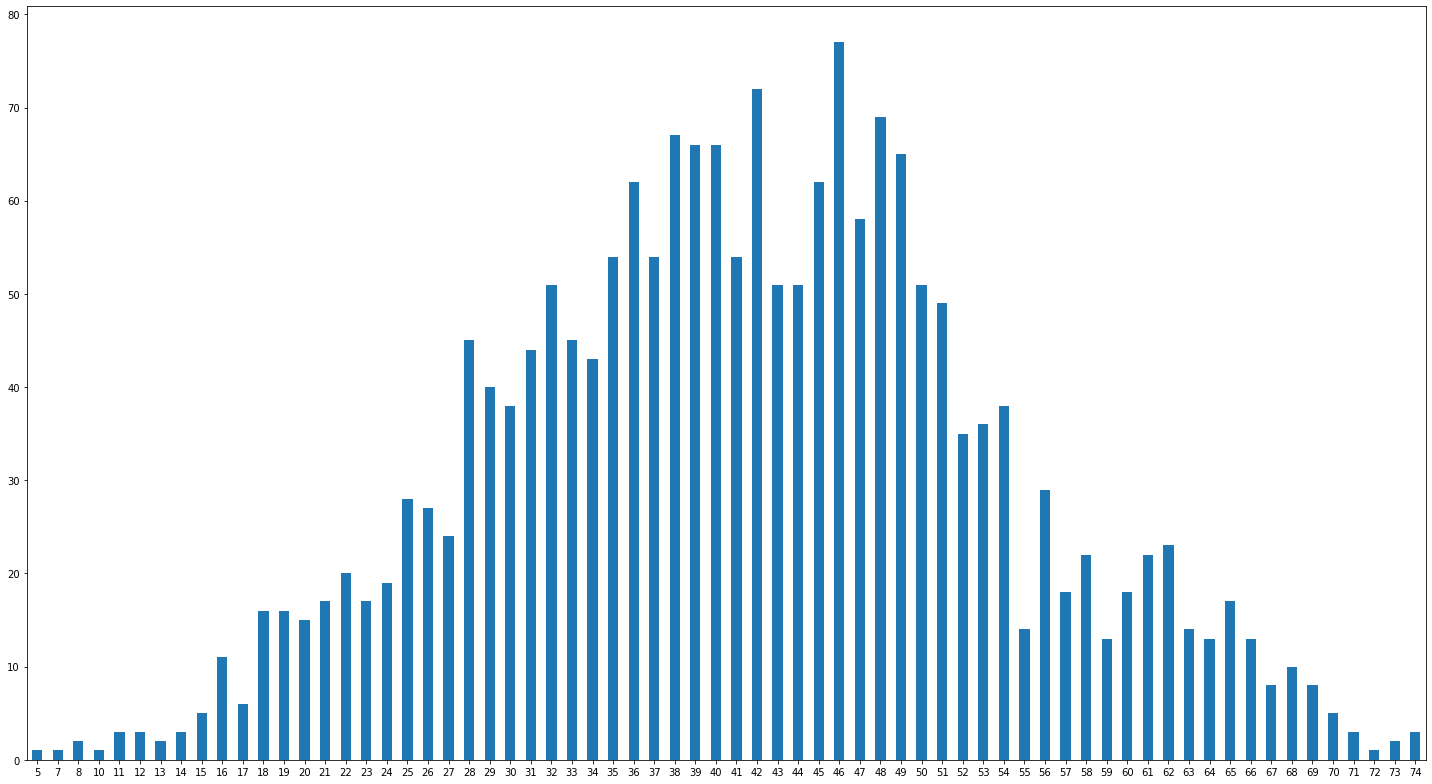

In [97]:
dfwithoutdate['Winning_Number_4'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (20,11),rot=0)

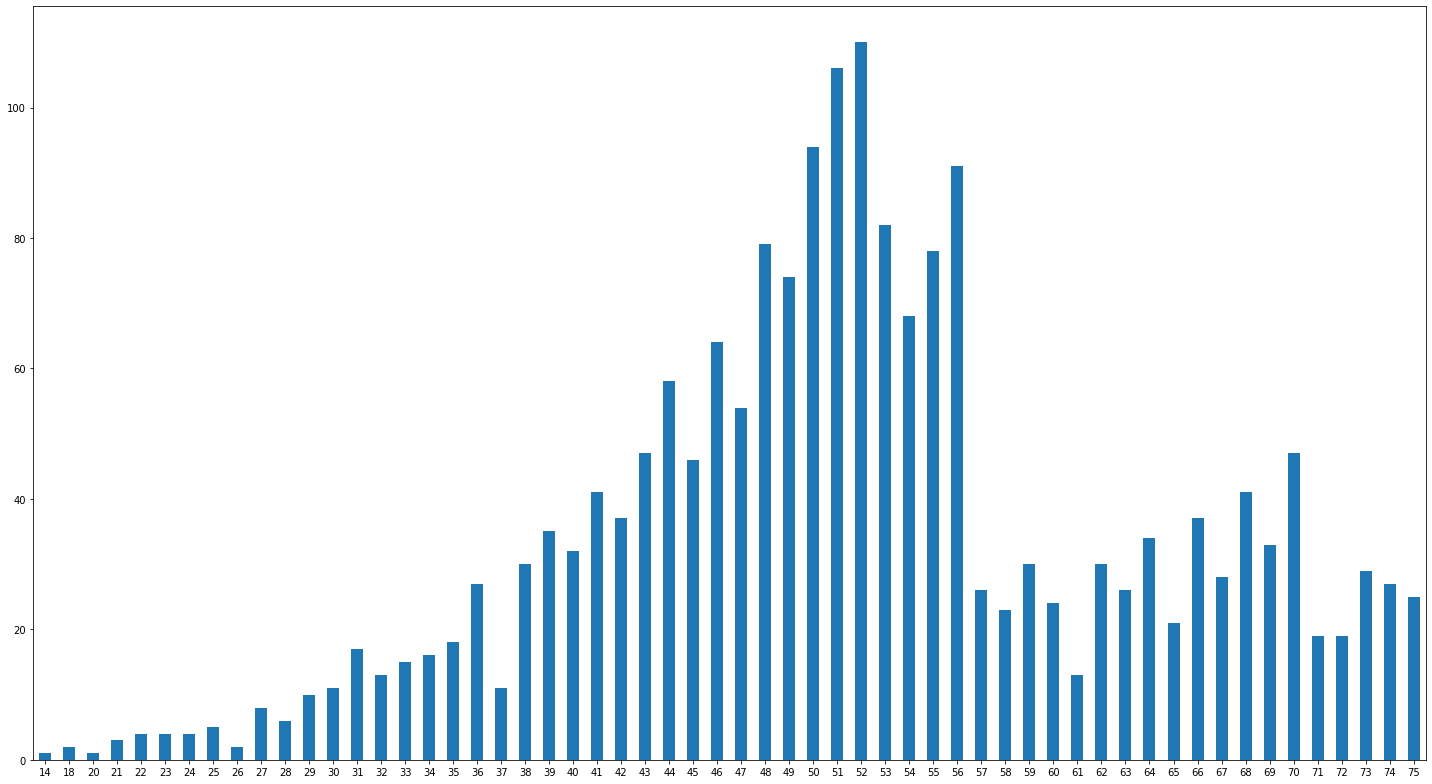

In [96]:
dfwithoutdate['Winning_Number_5'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (20,11),rot=0)

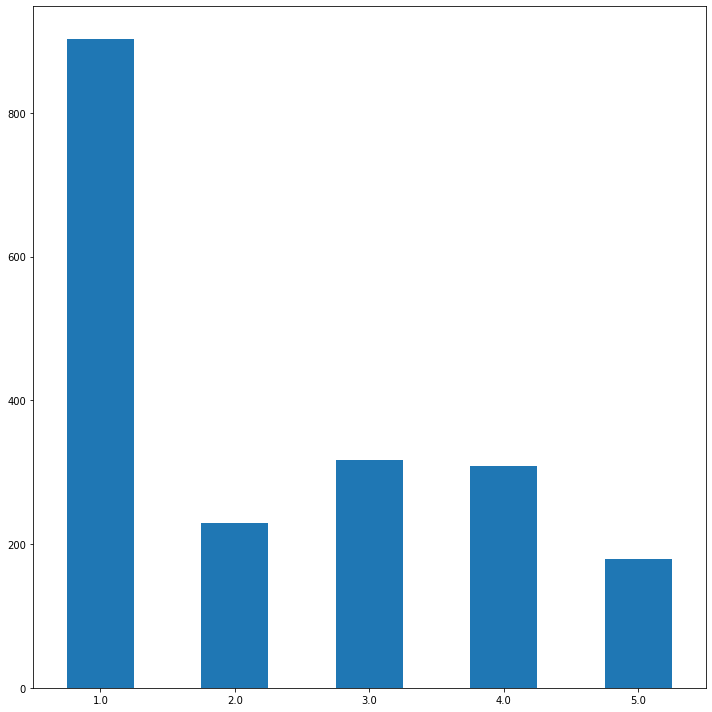

In [95]:
dfwithoutdate['Multiplier'].value_counts().sort_index().plot.bar(x='What number won',y='Number of times won', figsize = (10,10),rot=0)

Multiplier was introduced in January 2011 so for all the lotteries before that multiplier value is by default 1

In [105]:
import matplotlib.pyplot as plt

In [109]:
column_indices = {name: i for i, name in enumerate(dfwithoutdate.columns)}

n = len(dfwithoutdate)
train_df = dfwithoutdate[0:int(n*0.7)]
val_df = dfwithoutdate[int(n*0.7):int(n*0.9)]
test_df = dfwithoutdate[int(n*0.9):]

num_features = dfwithoutdate.shape[1]

In [110]:
train_mean = train_df.mean()
train_std = train_df.std()

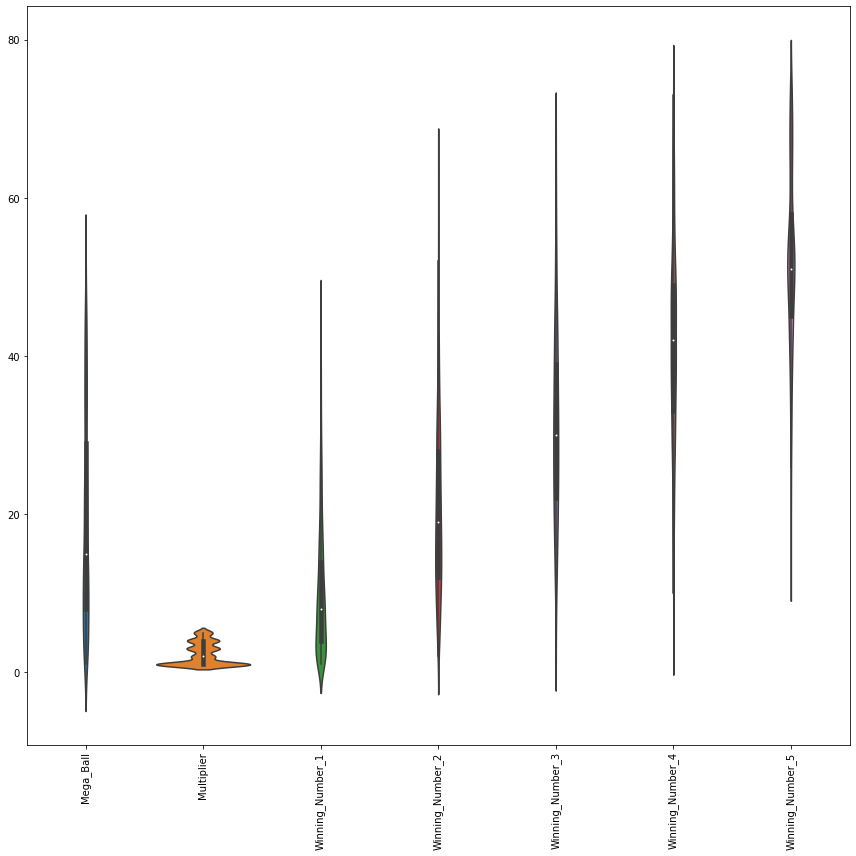

In [113]:
plt.figure(figsize=(12, 12))
ax = sns.violinplot(data=dfwithoutdate)
_ = ax.set_xticklabels(dfwithoutdate.keys(), rotation=90)